# LetsGrowMore (Virtual Internship Program)




# Beginner Level Task 2 : Stock Market Prediction and Forecasting Using Stacked LSTM

Author : PRASAD RAJARAM CHOUDHARI

In [30]:
# import necessary libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [31]:
# import the Data

data_Frame = pd.read_csv('NSE-TATAGLOBAL.csv')
data_Frame = data_Frame.dropna()
data_Frame.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [32]:
data_Frame.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [33]:
data_Frame_close = data_Frame['Close']

In [34]:
data_Frame_close.shape

(2035,)

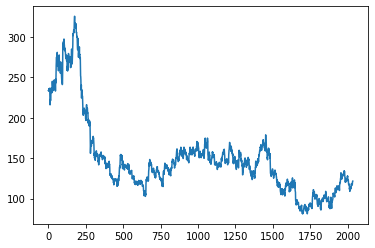

In [35]:
plt.plot(data_Frame_close)

since LSTM are sensitive to the scale of the data. So we apply MinMax scalar to transform our values between 0 and 1.

In [36]:
sd = MinMaxScaler(feature_range=(0, 1))
data_Frame_close = sd.fit_transform(np.array(data_Frame_close).reshape(-1, 1))

In [37]:
data_Frame_close.shape

(2035, 1)

In [38]:
data_Frame_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [39]:
# split the data into train and teat split

training_size = int(len(data_Frame_close) * 0.70)
test_size = len(data_Frame_close) - training_size
train_data, test_data = data_Frame_close[0: training_size,:], data_Frame_close[training_size: len(data_Frame_close),:1]

In [40]:
# creating the function

def create_dataset(dataset, times_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - times_step - 1):
        b = dataset[i:(i+times_step), 0]
        dataX.append(b)
        dataY.append(dataset [i+times_step, 0])
    return np.array(dataX), np.array(dataY)

In [41]:
times_step = 100
x_train, y_train = create_dataset(train_data, times_step)
x_test, y_test = create_dataset(test_data, times_step)


In [42]:
# Reshape the input

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [43]:
# Creating the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Fitting The Model

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size=64, verbose = 1)

Epoch 1/100
21/21 [==============================] - 17s 308ms/step - loss: 0.0263 - val_loss: 0.0032
Epoch 2/100
21/21 [==============================] - 5s 247ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 3/100
21/21 [==============================] - 5s 249ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/100
21/21 [==============================] - 5s 247ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5/100
21/21 [==============================] - 5s 250ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/100
21/21 [==============================] - 5s 246ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/100
21/21 [==============================] - 5s 243ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/100
21/21 [==============================] - 5s 248ms/step - loss: 0.0011 - val_loss: 9.3568e-04
Epoch 9/100
21/21 [==============================] - 6s 272ms/step - loss: 0.0011 - val_loss: 8.6272e-04
Epoch 10/100
21/21 [==============================] - 5s 254ms/step - loss: 0.0010

In [46]:
# Predicting and Checking performance matrics

train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

In [47]:
#Transforming back to the original form

train_prediction = sd.inverse_transform(train_prediction)
test_prediction = sd.inverse_transform(test_prediction)

In [48]:
# Calculating RMSE performance matrics

math.sqrt(mean_squared_error(y_train, train_prediction))



165.92591250533516

In [49]:
# Test data RMSE

math.sqrt(mean_squared_error(y_test, test_prediction))


108.4101276837301

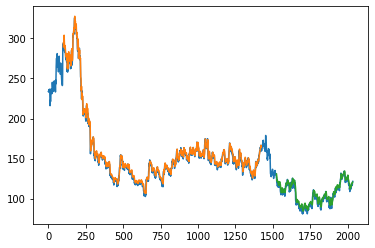

In [50]:
# Plotting

#Shifting train prediction for plotting

lb = 100
train_prediction_Plot = np.empty_like(data_Frame_close)
train_prediction_Plot[:,:] = np.nan
train_prediction_Plot[lb:len(train_prediction) + lb, :] = train_prediction

#Shifting Train Prediction for plotting

test_prediction_Plot = np.empty_like(data_Frame_close)
test_prediction_Plot[:,:] = np.nan
test_prediction_Plot[len(train_prediction) + (lb * 2) + 1: len(data_Frame_close) - 1, :] = test_prediction

#Plotting baseline and Predictions

plt.plot(sd.inverse_transform(data_Frame_close))
plt.plot(train_prediction_Plot)
plt.plot(test_prediction_Plot)
plt.show()

predict the next 30 days Stock Price


In [51]:
len(test_data), x_test.shape

(611, (510, 100, 1))

In [52]:
x_input = test_data[511:].reshape(1, -1)
x_input.shape

(1, 100)

In [53]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [54]:
l_output = []
n_steps = 100
next_Number_Of_Days = 30
i = 0

while(i < next_Number_Of_Days):
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {} ".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yp = model.predict(x_input, verbose = 0)
        print("{} day output {} ".format(i, yp))
        temp_input.extend(yp[0].tolist())
        temp_input = temp_input[1:]
        l_output.extend(yp.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yp = model.predict(x_input, verbose = 0)
        print(yp[0])
        temp_input.extend(yp[0].tolist())
        print(len(temp_input))
        l_output.extend(yp.tolist())
        i = i+1

print(l_output)

[0.16980179]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [55]:
new_day = np.arange(1,101)
day_pred = np.arange(101,131)

In [56]:
data_Frame2 = data_Frame_close.tolist()
data_Frame2.extend(l_output)

In [57]:
len(data_Frame_close)

2035

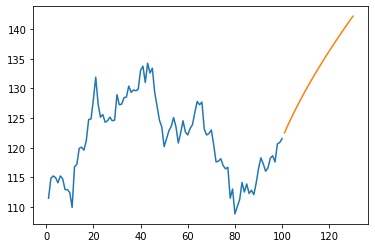

In [58]:
plt.plot (new_day, sd.inverse_transform(data_Frame_close[1935:]))
plt.plot (day_pred, sd.inverse_transform(l_output))